In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jochym/miniconda/envs/p3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [1]:
import math
import time
from datetime import datetime
import ephem
 
degrees_per_radian = 180.0 / math.pi
 
home = ephem.Observer()
home.lon = '20.033'   # +E
home.lat = '50.083'   # +N
home.elevation = 190 # meters
 
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   16242.95117257  .00002267  00000-0  41163-4 0  9998',
    '2 25544  51.6453  49.9577 0002889 256.1824 240.1556 15.54345818 16466'
)



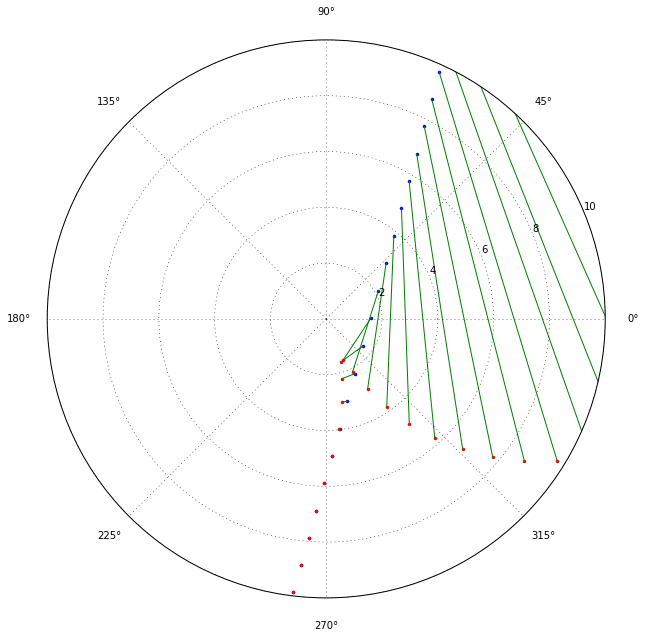

In [102]:
figsize(10,10)
home.date='2016/09/13 3:34:00'
home.date='2016/09/12 2:50:00'
#home.date='2016/09/18 2:26:00'
alt=0
az=math.pi*0/180
altv=math.pi/45
azv=math.pi/45
dt=1/(24*60*60)
maxalt=75*math.pi/180
for t in range(0,400) :
    iss.compute(home)
    iaz, ialt = iss.az, iss.alt
    polar(iss.az, 90-iss.alt * degrees_per_radian,'b.')
    polar(az, 90 - alt * degrees_per_radian,'r.')
    polar([az,iss.az],[90 - alt * degrees_per_radian, 90-iss.alt * degrees_per_radian],'g-')

    home.date=home.date+dt
    iss.compute(home)
    iazv=(iss.az-iaz)
    ialtv=(iss.alt-ialt)
    
    dalt=abs(iss.alt-alt)
    daz=iss.az-az

    flip = 1 if (abs(daz)>azv and alt>maxalt) else -1
    
    if (alt<iss.alt) :
        alt+=min(altv,dalt)
    else :
        alt-=min(altv,dalt)
    #alt=min(alt,maxalt)
    
    if daz > math.pi :
        daz-=2*math.pi
    elif daz < -math.pi :
        daz+=2*math.pi
        
    if daz<0 :
        az-=min(azv,abs(daz))
    else :
        az+=min(azv,abs(daz))
    ylim(0,10)

In [41]:
home.date=home.date+1/(60*60*24)
print(home.date)

2016/9/12 03:05:21


In [47]:
180/60

3.0